In [4]:
from citipy import citipy as cp
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import pandas as pd
import numpy as np
import requests
import time
import requests
from scipy.stats import linregress
import gmaps
api_key="bc2b03c3e6dce10a8276a879def61735"

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"


In [6]:


#generating random latitudes and and longitudes
lats=np.random.randint(-180,180,1000)
longs=np.random.randint(-90,90,1000)

df= pd.DataFrame({"Latitude":lats,"Longitude":longs})
df
city_list=[]

for x in range(0,1000):
    
    city=cp.nearest_city(df.loc[x]["Latitude"],df.loc[x]["Latitude"]).city_name
    city_list.append(city)
    
df["City"]=city_list
df


,Latitude,Longitude,City
0,173,-84,pevek
1,22,31,faya
2,152,-36,chokurdakh
3,147,46,nizhneyansk
4,20,24,faya
...,...,...,...
995,138,-29,nizhneyansk
996,126,-81,tiksi
997,-98,-37,punta arenas
998,-44,40,chuy


In [7]:
temp=[]
Hum=[]
Cloud=[]
Wind=[]
lat=[]
lon=[]
units="metric"
query_url = f"{url}appid={api_key}&units={units}&q="

lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
# the try except allows me to run the loop wihtout errors when a city isnt in the api
for city in city_list:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        Hum.append(response['main']['humidity'])
        Wind.append(response["wind"]["speed"])
        Cloud.append(response["clouds"]["all"])
        print(city)
    except:
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        Hum.append(np.nan)
        Wind.append(np.nan)
        Cloud.append(np.nan)
        print(city+ "not in api")

print(temp)





pevek
faya
chokurdakh
nizhneyansknot in api
faya
punta arenas
nizhneyansknot in api
tiksi
nizhneyansknot in api
dikson
pevek
punta arenas
punta arenas
cidreira
georgetown
faya
mataura
punta arenas
punta arenas
punta arenas
ushuaia
georgetown
cotonou
ushuaia
punta arenas
saskylakh
punta arenas
saskylakh
ushuaia
ushuaia
axim
punta arenas
priyutovo
lafia
chokurdakh
mataura
ushuaia
georgetown
anloga
nizhneyansknot in api
matay
saskylakh
tabou
chokurdakh
georgetown
punta arenas
ushuaia
mataura
pevek
damietta
mataura
ushuaia
matay
punta arenas
arraial do cabo
chokurdakh
punta arenas
faya
tunceli
tiksi
khatanga
tiksi
mumford
punta arenas
mataura
yenotayevka
tiksi
khatanga
dikson
punta arenas
dikson
georgetown
tiksi
khatanga
yar-sale
ushuaia
punta arenas
axim
nizhneyansknot in api
arraial do cabo
nizhneyansknot in api
jalu
mar del plata
khatanga
warri
matay
mataura
axim
ushuaia
punta arenas
axim
punta arenas
ushuaia
vaini
punta arenas
vaini
yenotayevka
ushuaia
punta arenas
punta arenas
laguna


khatanga
chuy
yar-sale
urozhaynoye
pevek
dikson
faya
punta arenas
georgetown
nizhneyansknot in api
ushuaia
ushuaia
georgetown
faya
ushuaia
chokurdakh
punta arenas
punta arenas
punta arenas
ushuaia
georgetown
saskylakh
ushuaia
punta arenas
aksarka
ushuaia
chokurdakh
orda
punta arenas
ushuaia
punta arenas
punta arenas
pevek
saskylakh
dikson
jalu
mataura
punta arenas
labytnangi
ozinki
khatanga
ushuaia
matay
khatanga
nizhneyansknot in api
pevek
arraial do cabo
agirish
punta arenas
muzhi
punta arenas
tiksi
arraial do cabo
khatanga
dikson
jalu
ushuaia
lysva
cotonou
komsomolskiy
pevek
georgetown
ushuaia
samandag
chokurdakh
chokurdakh
medvedka
ushuaia
punta arenas
georgetown
mataura
punta arenas
cidreira
chokurdakh
mataura
chokurdakh
mataura
chokurdakh
saskylakh
tiksi
nizhneyansknot in api
khatanga
ushuaia
ushuaia
nizhneyansknot in api
alekseyevka
dipkarpaznot in api
saskylakh
punta arenas
tiksi
chokurdakh
chuy
orda
pevek
pevek
kilis
ushuaia
jalu
pevek
punta arenas
mataura
georgetown
ushuaia
u

In [8]:
#adding data to df
df["Temperature"]=temp
df["Humidity"]=Hum
df["Cloudiness"]=Cloud
df["Wind_Speed"]=Wind
df["Real_Latitude"]=lat
df["Rel_longitude"]=lon

#dropping cities that werent in api
df=df.dropna()


In [9]:
#reduccing to. required. number of cities
df2=df.head(500)
df2

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed,Real_Latitude,Rel_longitude
0,173,-84,pevek,-19.68,91.0,50.0,2.80,69.7008,69.7008
1,22,31,faya,14.50,44.0,0.0,2.06,18.3851,18.3851
2,152,-36,chokurdakh,-15.10,91.0,97.0,0.71,70.6333,70.6333
4,20,24,faya,14.50,44.0,0.0,2.06,18.3851,18.3851
5,-142,39,punta arenas,2.00,93.0,0.0,2.06,-53.1500,-53.1500
...,...,...,...,...,...,...,...,...,...
518,25,-1,jalu,12.27,69.0,4.0,4.30,29.0331,29.0331
519,15,0,mao,11.00,100.0,0.0,3.60,39.8885,39.8885
520,91,72,dikson,-30.39,95.0,7.0,1.64,73.5069,73.5069
521,112,-1,saskylakh,-27.81,98.0,100.0,4.04,71.9167,71.9167


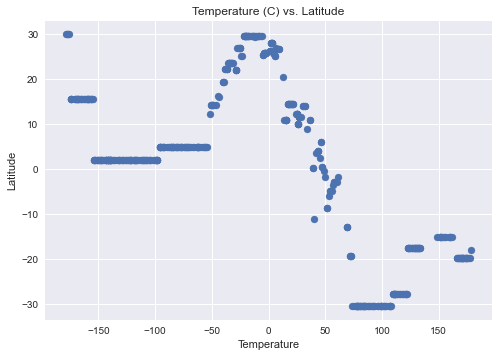

In [11]:
#plots of latitude vs weatther data
plt.scatter(df2["Latitude"],df2["Temperature"])
plt.title("Temperature (C) vs. Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show()

Text(0, 0.5, 'Latitude')

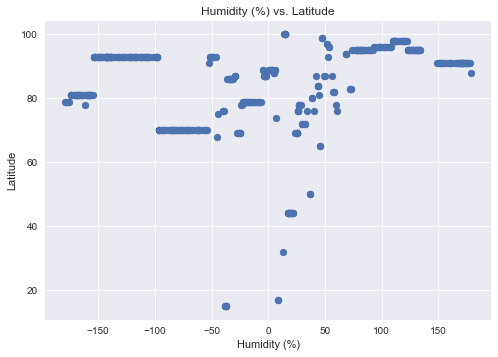

In [12]:
plt.scatter(df2["Latitude"],df2["Humidity"])
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

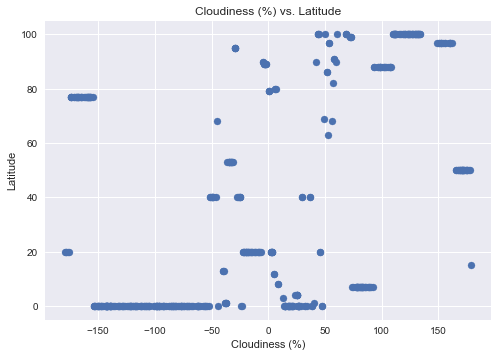

In [13]:
plt.scatter(df2["Latitude"],df2["Cloudiness"])
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

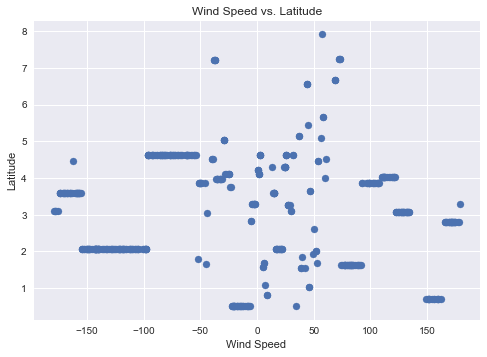

In [14]:
plt.scatter(df2["Latitude"],df2["Wind_Speed"])
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Wind Speed ")
plt.ylabel("Latitude")

In [15]:
North=df2.loc[df2["Real_Latitude"]>=0]

South=df2.loc[df2["Real_Latitude"]<0]


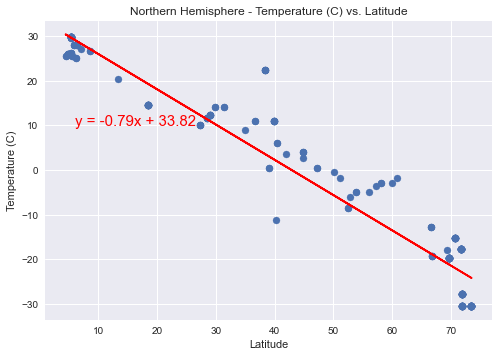

In [16]:
# Add the linear regression equation and line to plot
x_values = North['Real_Latitude']
y_values = North['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Temperature (C) vs. Latitude")
plt.ylabel('Temperature (C)')
plt.show()

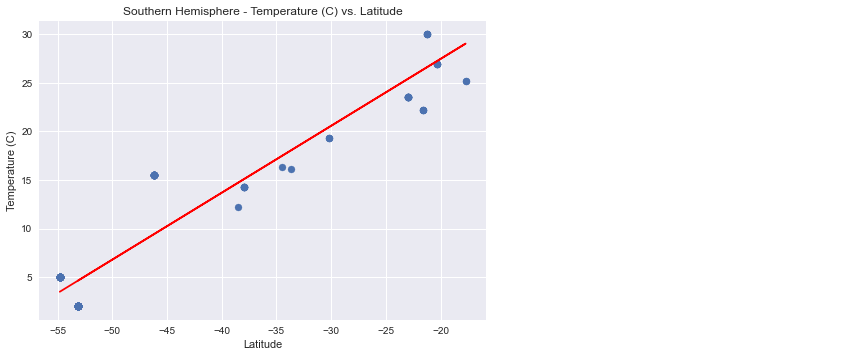

In [17]:
x_values = South['Real_Latitude']
y_values = South['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Temperature (C) vs. Latitude")
plt.ylabel('Temperature (C)')
plt.show()
#These ttwo plotts generally show that temp increses the closer a city is to tthe equator

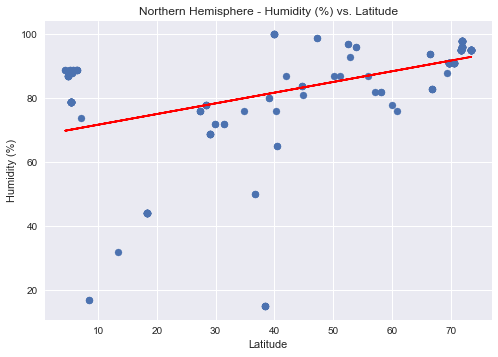

In [18]:
x_values = North['Real_Latitude']
y_values = North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel('Humidity (%)')
plt.show()

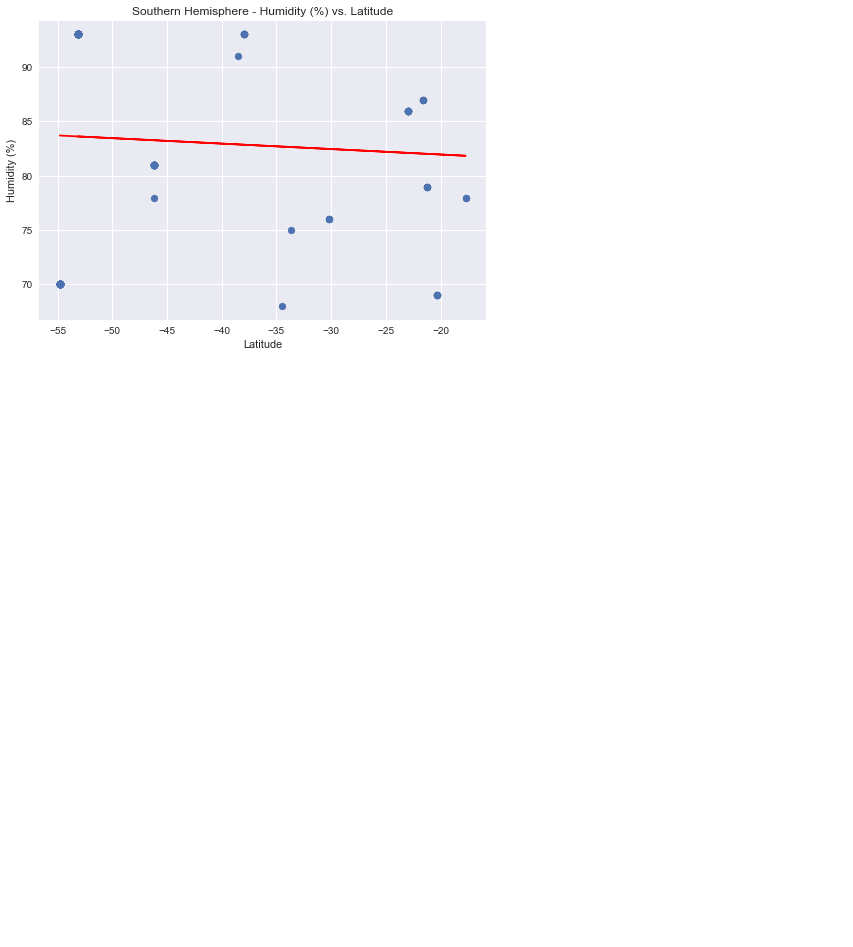

In [19]:
x_values = South['Real_Latitude']
y_values = South['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel('Humidity (%)')
4plt.show()
#These plots show that wind speed generally increases near the poles

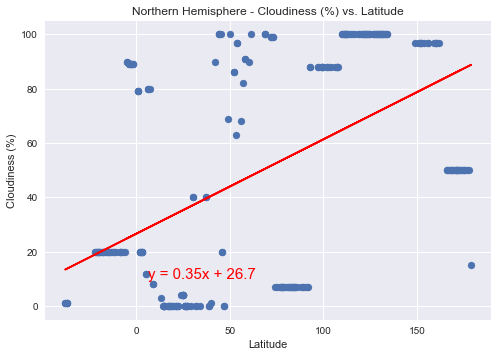

In [20]:
x_values = North['Latitude']
y_values = North['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()

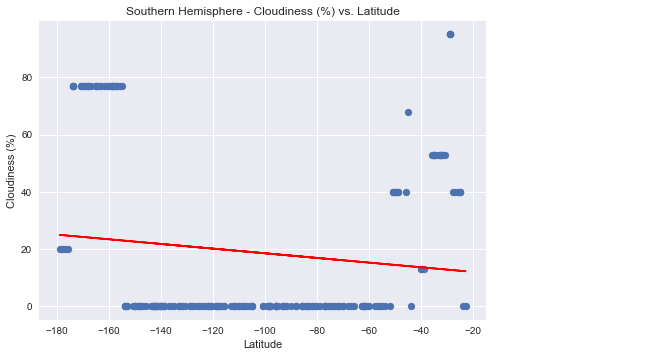

In [21]:
x_values = South['Latitude']
y_values = South['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()
#these two graphs show that the poles are cloudier

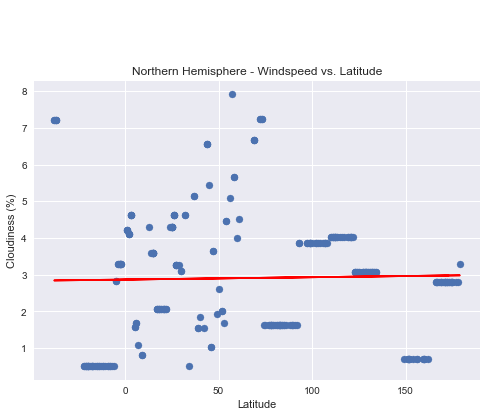

In [22]:
x_values = North['Latitude']
y_values = North['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Windspeed vs. Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()

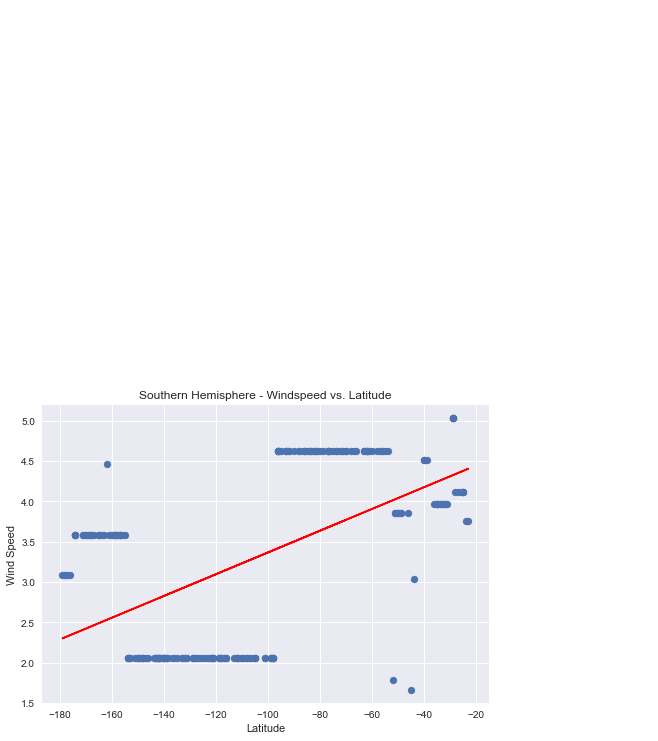

In [23]:
x_values = South['Latitude']
y_values = South['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Windspeed vs. Latitude")
plt.ylabel('Wind Speed')
plt.show()

In [24]:
df2.to_csv("Final_Weather.csv")